In [8]:
import os
import h5py
import math
import numpy as np
import torch
import scipy
from collections import defaultdict
from matplotlib import pyplot as plt

%matplotlib inline

In [14]:
def view_mri(data_dir, file_index=0, index=0, coil=0, max_col=4, figsize=(15, 4), show_real_imgag=False, save_location=None):
    file_names = os.listdir(data_dir)
    mri = h5py.File(os.path.join(data_dir, sorted(file_names)[file_index]))
    hf_attr = dict(mri.attrs)

    maps = {}
    for key in mri.keys():
        field = np.squeeze(mri[key])
        if len(field.shape)== 3:
            field = field[index, :, :]
        elif len(field.shape)== 4:
            if abs(np.min(field) - np.max(field)) > 1.0:
                field = torch.softmax(torch.from_numpy(field), dim=1).numpy()
            field = [field[index, i, :, :] for i in range(field.shape[1])]
        
        if isinstance(field, (tuple, list)):
            for i in range(len(field)):
                maps[f"{key}_{i}"] = field[i]
        elif np.iscomplex(field).any():
            map = np.abs(field)
            if key == "kspace":
                map = np.log(map + 1e-9)
            maps[key] = map 
            if show_real_imgag:
                maps[f"{key}_real"] = np.real(field)
                maps[f"{key}_img"] = np.imag(field)
        else:
            maps[key] = field
    
    n_cols = min(max_col, len(maps.keys()))
    n_rows = math.ceil(len(maps.keys()) / n_cols)
    fig = plt.figure(figsize=figsize)
    for i, key in enumerate(maps.keys()):
        plt.subplot(n_rows, n_cols, i + 1)
        ax = plt.imshow(maps[key])
        plt.colorbar(ax)
        plt.title(key)
    subtitle_str = ""
    for metric in hf_attr.keys():
        subtitle_str += f"{metric}: {hf_attr[metric][index]:0.5f}, "
    plt.suptitle(f"{file_index}: {sorted(file_names)[file_index]}, slice: {index}")
    # plt.figtext(s=subtitle_str, x=0.2, y=-0.03, )
    plt.tight_layout()
    if save_location:
        plt.savefig(save_location, bbox_inches='tight', dpi=300, format='png')
    plt.show()

def get_metrics(data_dir, index=None, slice_int=None):
    results = {}
    if index is not None:
        files = [sorted(os.listdir(data_dir))[index]]
    else:
        files = sorted(os.listdir(data_dir))

    for f in files:
        input_path = os.path.join(data_dir, f)
        hf = h5py.File(input_path)
        hf_attr = dict(hf.attrs)

        for key, value in hf_attr.items():
            if key not in results:
                results[key] = list(value)
            else:
                results[key].extend(list(value))

    for key, value in results.items():
        print(f"{key}: \t {np.nanmean(np.ma.masked_invalid(np.array(value)))}")
    print("---------")
    return results

CIRIM_1_64F_poisson2d

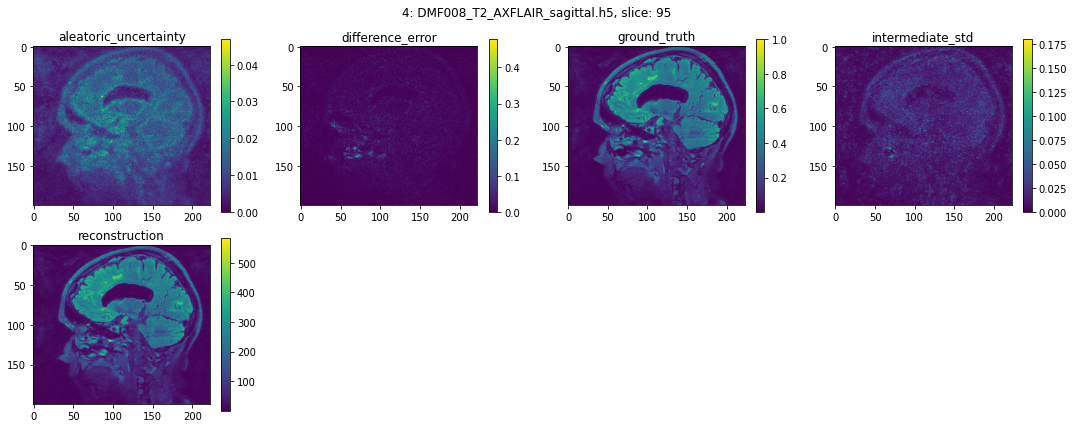

l1: 	 0.003138637679956418
l1_std: 	 0.0002803775632489048
loss: 	 0.003138637679956418
loss_std: 	 0.0002803775632489048
psnr: 	 41.075857647424456
psnr_std: 	 0.5929053880390684
ssim: 	 0.9809461145108687
ssim_std: 	 0.0027494120987688565
---------


In [15]:
recon_results_dir = "/data/projects/tecfidera/data/results/reconstruction/cirim_1c_64f_poisson2d/"
file_index = 4 #np.random.randint(0, len(os.listdir(recon_results_dir)))
slice_int = 95
coil = 0
view_mri(recon_results_dir, file_index=file_index, index=slice_int, figsize=(15, 6))
metric_result_dict = get_metrics(recon_results_dir)

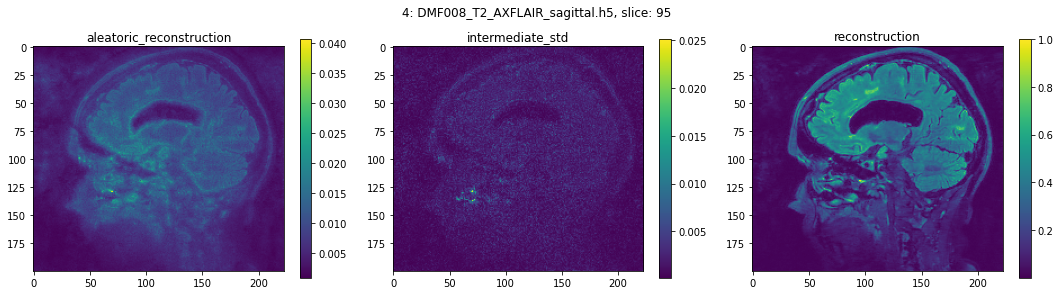

l1: 	 0.0020520040872359685
l1_std: 	 0.0004358211706354552
loss: 	 0.0020520040872359685
loss_std: 	 0.0004358211706354552
psnr: 	 43.382197999184285
psnr_std: 	 0.9649062004970052
ssim: 	 0.9898973455700512
ssim_std: 	 0.00449819447034003
---------


In [157]:
recon_results_dir = "/data/projects/tecfidera/data/results/reconstruction/cirim_8c_64f_poisson2d/"
file_index = 4
slice_int = 95
coil = 0
view_mri(recon_results_dir, file_index=file_index, index=slice_int)
metric_result_dict = get_metrics(recon_results_dir)

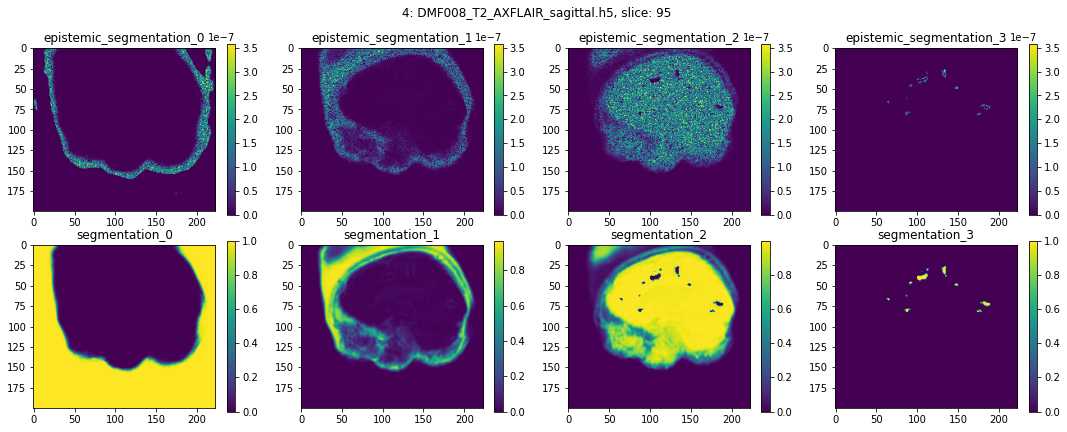

average_surface_distance: 	 1.4081592001041487
average_surface_distance_std: 	 0.6114492173705732
cross_entropy: 	 0.021062705810267358
cross_entropy_std: 	 7.365930055034789e-10
dice_background: 	 0.9887387211333182
dice_background_std: 	 2.12054203737423e-08
dice_graymatter: 	 0.602642370596511
dice_graymatter_std: 	 1.9713382981817643e-08
dice_lesion: 	 0.3022355559514889
dice_lesion_std: 	 1.0788565016803958e-08
dice_loss: 	 0.2226639907597188
dice_loss_std: 	 6.932402367575136e-09
dice_score: 	 0.7773360262289615
dice_score_std: 	 1.8760205941552632e-08
dice_whitematter: 	 0.5382945940460145
dice_whitematter_std: 	 1.8018580738851192e-08
f1_background: 	 0.9887387211823672
f1_background_std: 	 2.1190954323739453e-08
f1_graymatter: 	 0.6026423706639816
f1_graymatter_std: 	 1.9643991150309723e-08
f1_lesion: 	 0.3022355562399834
f1_lesion_std: 	 1.0886775932286959e-08
f1_macro: 	 0.48105752366480536
f1_macro_std: 	 1.6293956398755387e-08
f1_micro: 	 0.6086382732837389
f1_micro_std: 	

In [158]:
seg_results_dir = "/data/projects/tecfidera/data/results/segmentation/unet_3.7/"
file_index = 4
slice_int = 95
coil = 0
view_mri(seg_results_dir, file_index=file_index, index=slice_int, figsize=(15, 6))
metric_result_dict = get_metrics(seg_results_dir)